<a href="https://colab.research.google.com/github/Fuad-Khan/Religious-Harassment-Models/blob/main/Research_Deep_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,331,521 (5.08 MB)

 Trainable params: 1,331,521 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 28s 196ms/step - accuracy: 0.7108 - loss: 0.6105 - val_accuracy: 0.7154 - val_loss: 0.5989
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.7233 - loss: 0.5940 - val_accuracy: 0.7176 - val_loss: 0.5939
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.7258 - loss: 0.5900 - val_accuracy: 0.7181 - val_loss: 0.5947
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 192ms/step - accuracy: 0.7284 - loss: 0.5830 - val_accuracy: 0.7170 - val_loss: 0.5955
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      3236
           1       0.75      0.06      0.10      1348

    accuracy                           0.72      4584
   macro avg       0.73      0.52      0.47      4584
weighted avg       0.73      0.72      0.62      4584



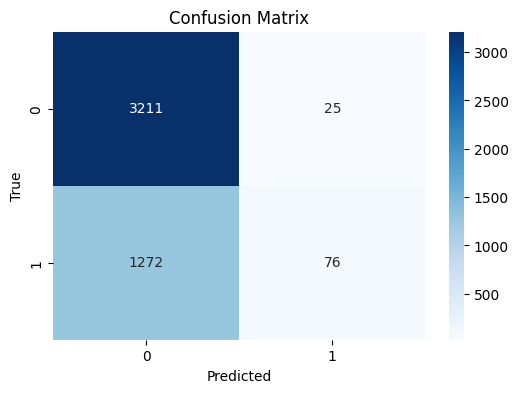

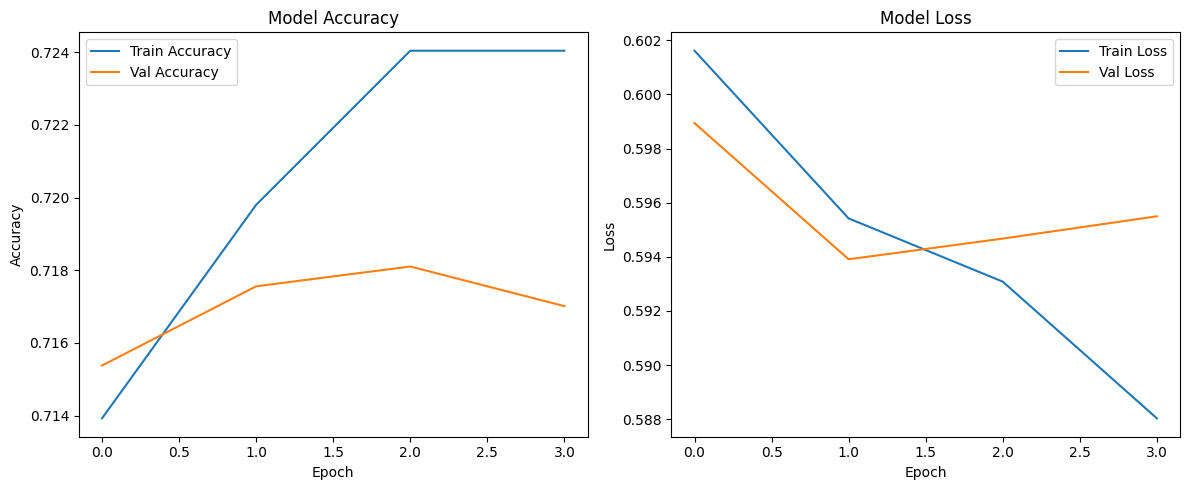

✅ Model saved as 'lstm_religious_model.h5'
✅ Tokenizer saved as 'tokenizer.pkl'


In [4]:
# ✅ Step 1: Install required libraries
# !pip install -q tensorflow pandas scikit-learn matplotlib

# ✅ Step 2: Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pickle

# ✅ Step 3: Load your dataset
file_path = '/content/Cleaned_Labeled_Religious_Comments.csv'  # Make sure file is uploaded
df = pd.read_csv(file_path)

# ✅ Step 4: Prepare text and labels
texts = df['comment'].astype(str).values
labels = df['label_binary'].values  # Assumes binary labels (0/1)

# ✅ Step 5: Tokenization and padding
vocab_size = 10000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# ✅ Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# ✅ Step 7: Build LSTM model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use softmax and categorical_crossentropy if multi-class
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

# ✅ Step 8: Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# ✅ Step 9: Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop]
)

# ✅ Step 10: Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ✅ Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ✅ Step 11: Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Step 12: Save model and tokenizer
model.save('/content/lstm_religious_model.h5')

with open('/content/tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Model saved as 'lstm_religious_model.h5'")
print("✅ Tokenizer saved as 'tokenizer.pkl'")


# CNN-LSTM model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 128)       │     1,536,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,614,273 (6.16 MB)

 Trainable params: 1,614,273 (6.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.7248 - loss: 0.5754 - val_accuracy: 0.9248 - val_loss: 0.2334
Epoch 2/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.9535 - loss: 0.1525 - val_accuracy: 0.9640 - val_loss: 0.1385
Epoch 3/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.9881 - loss: 0.0489 - val_accuracy: 0.9635 - val_loss: 0.1021
Epoch 4/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 167ms/step - accuracy: 0.9944 - loss: 0.0247 - val_accuracy: 0.9624 - val_loss: 0.1360
Epoch 5/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.9960 - loss: 0.0212 - val_accuracy: 0.9646 - val_loss: 0.1470
Epoch 6/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 167ms/step - accuracy: 0.9956 - loss: 0.0229 - val_accuracy: 0.9629 - val_loss: 0.1901
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3236
           1       0.98      0.91      0.94 

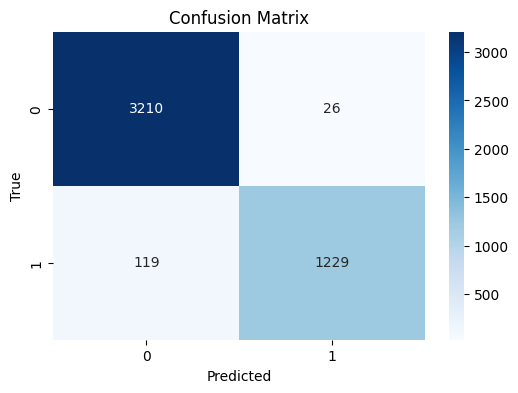

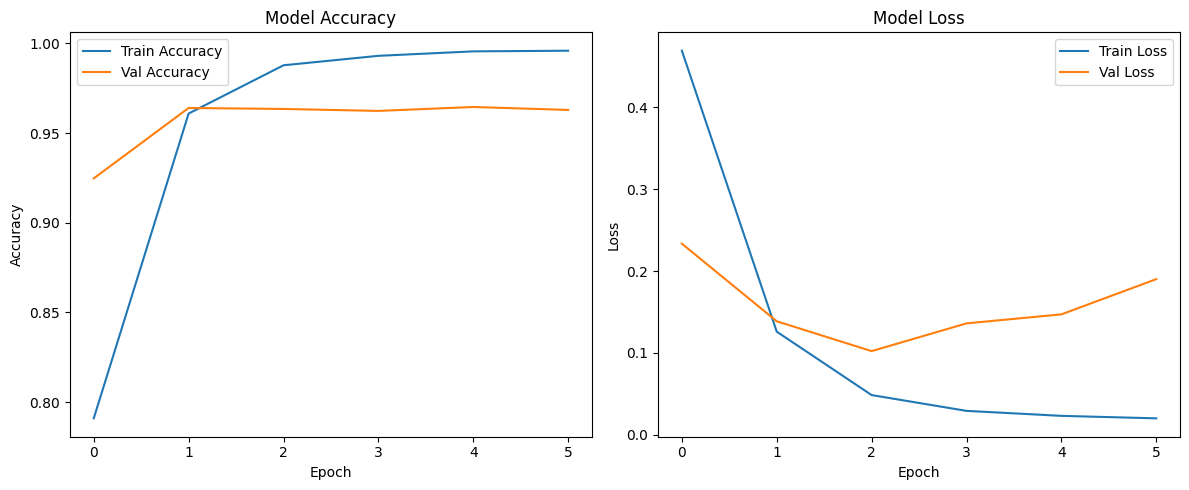

✅ Model saved as 'cnn-lstm_religious_model.h5'
✅ Tokenizer saved as 'cnn-lstm_tokenizer.pkl'


In [6]:
# 1. Install required packages
!pip install -q tensorflow pandas scikit-learn

# 2. Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ✅ Step 3: Load your dataset
file_path = '/content/Cleaned_Labeled_Religious_Comments.csv'  # Make sure file is uploaded
df = pd.read_csv(file_path)

# 5. Preprocess data
texts = df['comment'].astype(str).values
labels = df['label_binary'].values  # 1 = harassment, 0 = safe

# 6. Tokenize and pad Bangla text
vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# 8. CNN-LSTM model architecture
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build(input_shape=(None, max_length))
model.summary()



# 9. Train the model
history = model.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

# ✅ Step 10: Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ✅ Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ✅ Step 11: Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Step 12: Save model and tokenizer
model.save('/content/cnn-lstm_religious_model.h5')

with open('/content/cnn-lstm_tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Model saved as 'cnn-lstm_religious_model.h5'")
print("✅ Tokenizer saved as 'cnn-lstm_tokenizer.pkl'")
